In [1]:
# Run in Colab cell or terminal (local)
!pip install --quiet numpy pandas scikit-learn matplotlib seaborn tensorflow joblib
# If you need kaggle API in Colab (optional)
!pip install --quiet kaggle


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [4]:
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("tensorflow:", tf.__version__)

numpy: 2.0.2
pandas: 2.2.2
tensorflow: 2.19.0


...........................................................................

In [12]:
import pandas as pd

# Load the training dataset
df = pd.read_csv("train.csv")


In [10]:
import zipfile
import os

zip_file_path = 'mobile price range.zip'
extract_path = '.' # Extract to the current directory

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")
print(os.listdir(extract_path))

Files extracted to: .
['.config', 'mobile price range.zip', 'test.csv', 'train.csv', '.ipynb_checkpoints', 'sample_data']


In [9]:
import os
print(os.listdir())

['.config', 'mobile price range.zip', '.ipynb_checkpoints', 'sample_data']


In [13]:
df = pd.read_csv("train.csv")

In [14]:
df.shape

(2000, 21)

In [15]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [20]:
# Quick info
print("Shape:", df.shape)
display(df.head())
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nTarget distribution (price_range):")
print(df['price_range'].value_counts().sort_index())
print("\nDescriptive statistics:")
display(df.describe().T)

Shape: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  t

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


##EDA

In [28]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


/tmp/ipython-input-3486181183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='viridis')


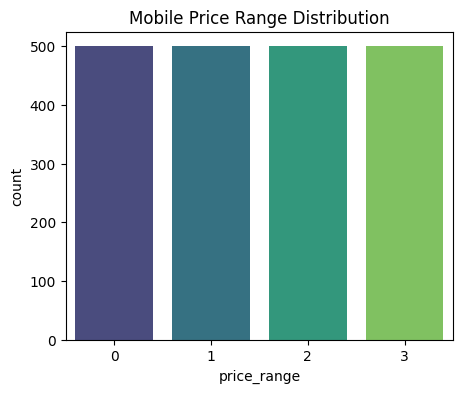

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x='price_range', data=df, palette='viridis')
plt.title("Mobile Price Range Distribution")
plt.show()

/tmp/ipython-input-2225953411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


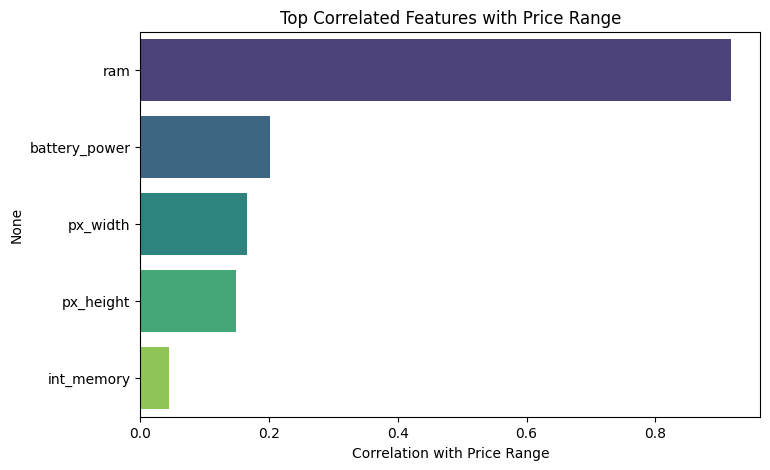

In [24]:
top_corr = corr_with_target[1:6]  # skip the target itself
plt.figure(figsize=(8,5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title("Top Correlated Features with Price Range")
plt.xlabel("Correlation with Price Range")
plt.show()


In [25]:
corr_with_target = df.corr()['price_range'].sort_values(ascending=False)
print("\nTop features correlated with price_range:\n", corr_with_target.head(6))



Top features correlated with price_range:
 price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
Name: price_range, dtype: float64


/tmp/ipython-input-3450979294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=df, palette='mako')


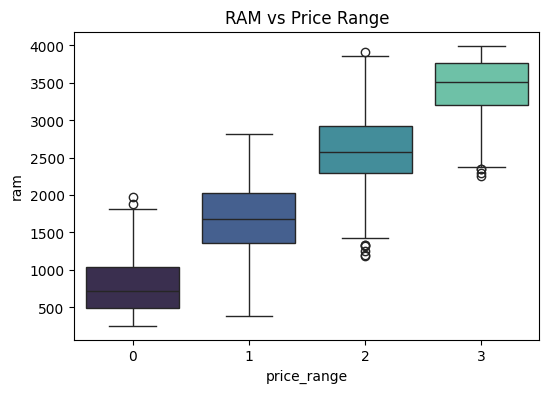

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x='price_range', y='ram', data=df, palette='mako')
plt.title("RAM vs Price Range")
plt.show()

##Data Preprocessing

Separate features and target

In [29]:
# X = all features, y = target
X = df.drop('price_range', axis=1)
y = df['price_range']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (2000, 20)
Target shape: (2000,)


Split into training and testing sets

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())


X_train: (1600, 20) X_test: (400, 20)
y_train distribution:
 price_range
1    400
0    400
3    400
2    400
Name: count, dtype: int64


Scale features

ANN performs better when features are scaled.

Use StandardScaler to scale features to mean=0, std=1.

In [31]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Save the scaler for later use in predictions
joblib.dump(scaler, "scaler_mobile_price.save")
print("Scaler saved as scaler_mobile_price.save")


Scaler saved as scaler_mobile_price.save


Convert target to one-hot encoding

For multi-class classification (4 classes), ANN needs one-hot encoded labels.

In [32]:
from tensorflow.keras.utils import to_categorical

NUM_CLASSES = 4
y_train_cat = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test_cat  = to_categorical(y_test, num_classes=NUM_CLASSES)

print("One-hot shape:", y_train_cat.shape)


One-hot shape: (1600, 4)


Prepare labels for Keras (one-hot)

In [33]:
NUM_CLASSES = len(np.unique(y))  # should be 4
y_train_cat = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test_cat  = to_categorical(y_test, num_classes=NUM_CLASSES)

print("One-hot shapes:", y_train_cat.shape, y_test_cat.shape)


One-hot shapes: (1600, 4) (400, 4)
